## Download video

In [4]:
# !pip install --upgrade gdown --quiet 

#VIRAT_S_010204_05_000856_000890.mp4
!gdown 1QnlmTfucCOeLNNO39b_lBcT9BqmeIKGb 
#IP_Camera_Daytime_Viewing_a_person_walking.mp4
!gdown 1by3qSXI1BkGu8H1R-7zXIwSOaY0S1rai 

Downloading...
From: https://drive.google.com/uc?id=1QnlmTfucCOeLNNO39b_lBcT9BqmeIKGb
To: d:\KKU_World\Learn\second_year\2_1\aiWorkshop\VIRAT_S_010204_05_000856_000890.mp4

  0%|          | 0.00/5.25M [00:00<?, ?B/s]
 10%|▉         | 524k/5.25M [00:00<00:01, 3.08MB/s]
 30%|██▉       | 1.57M/5.25M [00:00<00:00, 6.21MB/s]
 70%|██████▉   | 3.67M/5.25M [00:00<00:00, 10.2MB/s]
100%|██████████| 5.25M/5.25M [00:00<00:00, 10.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1by3qSXI1BkGu8H1R-7zXIwSOaY0S1rai
To: d:\KKU_World\Learn\second_year\2_1\aiWorkshop\IP_Camera_Daytime_Viewing_a_person_walking.mp4

  0%|          | 0.00/1.71M [00:00<?, ?B/s]
 31%|███       | 524k/1.71M [00:00<00:00, 2.99MB/s]
 92%|█████████▏| 1.57M/1.71M [00:00<00:00, 6.20MB/s]
100%|██████████| 1.71M/1.71M [00:00<00:00, 5.87MB/s]


## 1. การติดตั้งและนำเข้าไลบรารี

ส่วนนี้เป็นการติดตั้ง YOLOv10 จาก GitHub และนำเข้าไลบรารีที่จำเป็น เช่น
* OpenCV สำหรับการประมวลผลภาพ,
* NumPy สำหรับการคำนวณ,
* Pandas สำหรับจัดการข้อมูล และ
* Matplotlib สำหรับการแสดงผลกราฟิก

In [5]:
!git clone https://github.com/THU-MIG/yolov10.git
!pip install yolov10/.

Cloning into 'yolov10'...


Processing d:\kku_world\learn\second_year\2_1\aiworkshop\yolov10
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached torch-2.4.1-cp310-cp310-win_amd64.whl.metadata (27 kB)
  Using cached torchvision-0.19.1-cp310-cp310-win_amd64.whl.metadata (6.1 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Using cached torch-2.4.1-cp310-cp310-win_amd64.whl (199.4 MB)
Using cached torchvision-0.19.1-cp310-cp310-win_amd64.whl (1.3 MB)
  Created wheel for ultralytics: filename=ultralytics-8.1.34-py3-none-any.whl size=735427 sha256=99402e3fd8e81c2fbb3cc90089327acbe6b4921145e97ac0f2d92ccbb3de70bb
  Stored in dir

In [6]:
exit()

: 

In [ ]:
!pip install ultralytics

In [3]:
import cv2
import numpy as np
import pandas as pd
from ultralytics import YOLOv10
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'huggingface_hub'

## 2. การโหลดโมเดล YOLOv10
ดาวน์โหลดไฟล์โมเดล YOLOv10 ที่ผ่านการเทรนมาแล้ว และโหลดเข้าสู่หน่วยความจำเพื่อใช้งาน

In [ ]:
!wget https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt

In [ ]:
model = YOLOv10('yolov10s.pt')
model.fuse()

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")


YOLOv10s summary (fused): 293 layers, 8096880 parameters, 8045664 gradients, 24.8 GFLOPs


In [ ]:
!mkdir frames

## การอ่านวิดีโอและประมวลผลเฟรม
ส่วนนี้เป็นการอ่านไฟล์วิดีโอ จากนั้นอ่านเฟรมแรกและเฟรมที่ 4 ของวิดีโอ และแปลงสีจาก BGR เป็น RGB

In [ ]:
cap = cv2.VideoCapture('/content/IP_Camera_Daytime_Viewing_a_person_walking.mp4')

ret, frame1 = cap.read()
frame1=cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

success = cap.grab()
success = cap.grab()
success = cap.grab()
ret, frame4 = cap.retrieve()
frame4=cv2.cvtColor(frame4, cv2.COLOR_BGR2RGB)
cap.release()

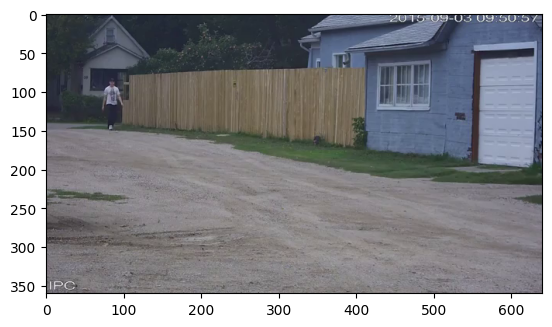

In [ ]:
plt.imshow(frame1)
plt.show()

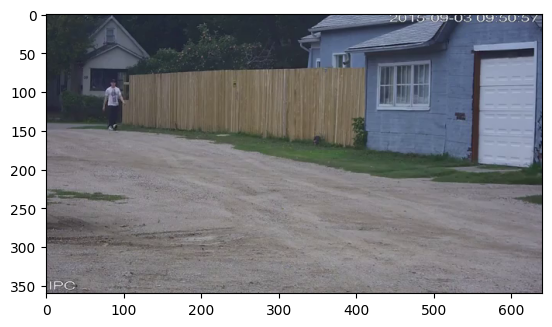

In [ ]:
plt.imshow(frame4)
plt.show()

## 4. ทดสอบการตรวจจับวัตถุ
ใช้โมเดล YOLOv10 ที่โหลดมาเพื่อตรวจจับวัตถุในเฟรมที่ 1 และ 4 จากนั้นดึงข้อมูลคลาสและพิกัดกล่องขอบเขต (bounding boxes) ของวัตถุที่ตรวจพบ

In [ ]:
results1 = model.predict(frame1)
results4 = model.predict(frame4)

In [ ]:
results1[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8799], device='cuda:0')
data: tensor([[ 72.0564,  84.9320,  99.5244, 151.2841,   0.8799,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (360, 640)
shape: torch.Size([1, 6])
xywh: tensor([[ 85.7904, 118.1081,  27.4680,  66.3521]], device='cuda:0')
xywhn: tensor([[0.1340, 0.3281, 0.0429, 0.1843]], device='cuda:0')
xyxy: tensor([[ 72.0564,  84.9320,  99.5244, 151.2841]], device='cuda:0')
xyxyn: tensor([[0.1126, 0.2359, 0.1555, 0.4202]], device='cuda:0')

In [ ]:
cls=results1[0].boxes.cls.cpu().numpy()
cls

array([          0], dtype=float32)

In [ ]:
boxes1=results1[0].boxes.xyxy.cpu().numpy()
boxes1[cls==0]

array([[     72.056,      84.932,      99.524,      151.28]], dtype=float32)

In [ ]:
boxes4=results4[0].boxes.xyxy.cpu().numpy()
boxes4[cls==0]

array([[     73.414,      85.326,      100.45,      151.44]], dtype=float32)

In [ ]:
xyxy=results1[0].boxes.xyxy.cpu().numpy()[cls==0]
xyxy

array([[     72.056,      84.932,      99.524,      151.28]], dtype=float32)

In [ ]:
frame_count=0
insert_index = 0
frame_xyxy = np.insert(xyxy, insert_index, frame_count, axis=1)
frame_xyxy

array([[          0,      72.056,      84.932,      99.524,      151.28]], dtype=float32)

In [ ]:
# prompt: append to empty numpy array rows

import numpy as np

# Create an empty numpy array
empty_array = np.empty((0, 5))  # Assuming 5 columns based on your example

# Example rows to append
row1 = np.array([1, 2, 3, 4, 5])
row2 = np.array([6, 7, 8, 9, 10])

# Append rows to the empty array
updated_array = np.append(empty_array, np.array([row1]), axis=0)
updated_array = np.append(updated_array, np.array([row2]), axis=0)

print(updated_array)


## 5. การประมวลผลข้อมูลตำแหน่งวัตถุ
วนลูปผ่านทุกเฟรมของวิดีโอ ตรวจจับคน (class 0) ในแต่ละเฟรม และบันทึกตำแหน่งของคนพร้อมกับหมายเลขเฟรม

In [ ]:
cap = cv2.VideoCapture('/content/IP_Camera_Daytime_Viewing_a_person_walking.mp4')

person = []
insert_index = 0
frame_count=0

ret, frame = cap.read()
while ret:
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = model.predict(frame, verbose=False,classes=[0])
    cls=results[0].boxes.cls.cpu().numpy()
    xyxy=results[0].boxes.xyxy.cpu().numpy()[cls==0]
    frame_xyxy = np.insert(xyxy, insert_index, frame_count, axis=1)
    person.append(frame_xyxy[0])

    #read next frame
    ret, frame = cap.read()
    frame_count+=1

cap.release()

## 6. การสร้าง DataFrame:

In [ ]:
columns = ['frame', 'x1', 'y1', 'x2', 'y2']
df = pd.DataFrame(person,columns=columns)
df

,frame,x1,y1,x2,y2
0,0.0,72.056396,84.932014,99.524384,151.284119
1,1.0,72.637787,84.578659,99.798737,151.725113
2,2.0,73.059189,85.245979,100.758194,151.412659
3,3.0,73.414322,85.325966,100.453049,151.437897
4,4.0,73.654030,85.802010,101.472069,151.307800
...,...,...,...,...,...
955,955.0,123.461365,36.533234,259.608032,351.691193
956,956.0,121.622147,34.453735,251.559158,351.874756
957,957.0,120.767296,31.413330,241.789764,351.869690
958,958.0,120.050865,28.835205,232.449982,351.881470


# multiple object

In [ ]:
cap = cv2.VideoCapture('/content/VIRAT_S_010204_05_000856_000890.mp4')

ret, frame1 = cap.read()
frame1=cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

success = cap.grab()
success = cap.grab()
success = cap.grab()
ret, frame4 = cap.retrieve()
frame4=cv2.cvtColor(frame4, cv2.COLOR_BGR2RGB)
cap.release()

In [ ]:
results1 = model.predict(frame1)
results4 = model.predict(frame4)

In [ ]:
cls=results1[0].boxes.cls.cpu().numpy()
cls

array([          0,           0,           0,           0,           0,           0,           0], dtype=float32)

In [ ]:
boxes1=results1[0].boxes.xyxy.cpu().numpy()
boxes1[cls==0]

array([[     882.26,      463.58,      940.52,      625.17],
       [     818.17,      452.27,      870.85,      614.76],
       [     970.58,      448.21,      1043.5,      618.28],
       [     738.42,      482.82,      811.43,      662.03],
       [     365.63,       275.4,      386.43,      333.75],
       [     519.25,      330.89,      544.49,      413.22],
       [     391.87,      267.78,      416.54,      334.34]], dtype=float32)

In [ ]:
cls=results4[0].boxes.cls.cpu().numpy()
cls

boxes4=results4[0].boxes.xyxy.cpu().numpy()
boxes4[cls==0]

array([[      749.9,      492.31,      832.65,      674.39],
       [     877.42,      462.41,      935.25,      625.08],
       [     963.16,      443.04,      1041.7,      616.13],
       [     811.61,      448.89,      865.28,      614.39],
       [     366.61,      273.37,      388.06,       333.3],
       [     394.17,      268.72,      417.76,      334.24],
       [     515.29,      322.87,      542.07,      410.66]], dtype=float32)

## การคำนวณระยะห่างระหว่างวัตถุที่อยู่ต่างเฟรม
ส่วนนี้คำนวณระยะห่างแบบยุคลิด (Euclidean distance) ระหว่างกล่องขอบเขตในเฟรมที่ 1 และเฟรมที่ 4 เพื่อดูว่าวัตถุเคลื่อนที่ไปมากน้อยเพียงใด

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
distances = euclidean_distances(boxes1,boxes4)
distances

array([[     180.01,      7.2479,      131.51,       104.8,      832.15,      796.32,      599.37],
       [     106.21,      88.701,      224.31,      9.2472,      740.41,       705.3,      508.16],
       [     313.42,      143.65,      9.4503,      238.82,       951.9,      914.68,      719.37],
       [     28.729,      190.88,      327.48,      108.07,      685.14,      653.27,      459.46],
       [     714.05,      826.43,      945.69,      732.84,      2.8152,      42.909,      234.08],
       [     480.11,       585.8,      705.74,      492.72,      239.72,      204.47,      9.6127],
       [     683.65,      791.98,       909.6,      699.13,       38.49,      2.7699,      199.63]], dtype=float32)

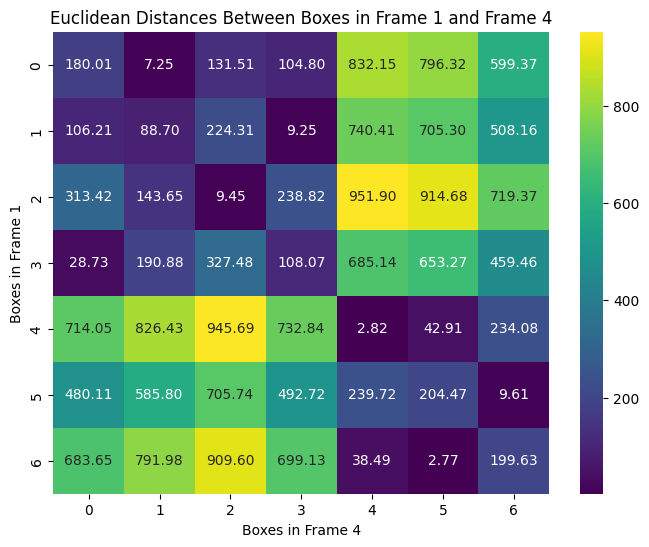

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(distances, annot=True, cmap='viridis', fmt=".2f")
plt.xlabel('Boxes in Frame 4')
plt.ylabel('Boxes in Frame 1')
plt.title('Euclidean Distances Between Boxes in Frame 1 and Frame 4')
plt.show()

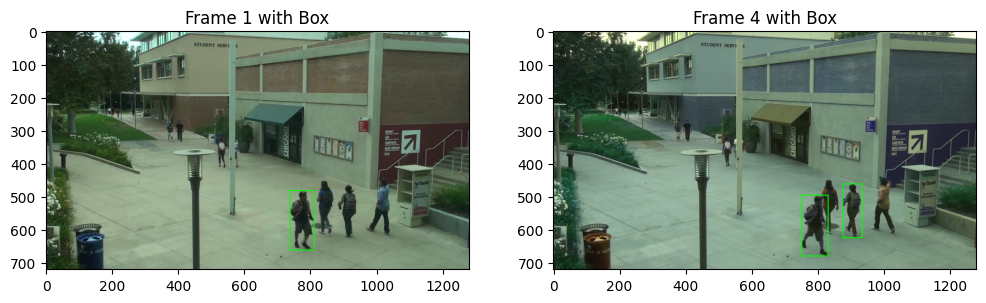

In [ ]:
# prompt: draw rectangle box of boxes1[0,:] in the frame1 and draw rectangle box of boxes4[1,:] in the frame4, then show

import matplotlib.pyplot as plt
# Draw rectangle box for boxes1[0,:] in frame1
x1, y1, x2, y2 = boxes1[3,:].astype(int)
cv2.rectangle(frame1, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Draw rectangle box for boxes4[1,:] in frame4
x1, y1, x2, y2 = boxes4[1,:].astype(int)
cv2.rectangle(frame6, (x1, y1), (x2, y2), (0, 255, 0), 2)


# Show the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(frame1)
plt.title('Frame 1 with Box')

plt.subplot(1, 2, 2)
plt.imshow(frame6)
plt.title('Frame 4 with Box')

plt.show()


In [ ]:
results = model.predict(frame4)

detections_xyxy = np.hstack((
        results[0].boxes.xyxy.cpu().numpy(),
        results[0].boxes.conf.cpu().numpy()[:, np.newaxis]
    ))